In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# 1. Load Processed Data (Saved in Step 2)
input_folder = '../data/processed'

# Load Features (X)
X_train = np.load(f'{input_folder}/X_train.npy')
X_val = np.load(f'{input_folder}/X_val.npy')
X_test = np.load(f'{input_folder}/X_test.npy')

# Load Targets (y)
y_train = np.load(f'{input_folder}/y_train.npy')
y_val = np.load(f'{input_folder}/y_val.npy')
y_test = np.load(f'{input_folder}/y_test.npy')

# Load Class Names (for reporting)
class_names = np.load(f'{input_folder}/class_names.npy', allow_pickle=True)

print(f"✅ Data Loaded Successfully!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Number of Classes: {len(class_names)} {class_names}")


✅ Data Loaded Successfully!
Training Data Shape: (629136, 24)
Number of Classes: 7 ['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [2]:
import os
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight

#
model_folder = '../models'
os.makedirs(model_folder, exist_ok=True) 

#
model_path = f'{model_folder}/best_ann_model_advanced.keras'

print(f"💾 Model Path: {model_path}")

# --- 2. SINIF AĞIRLIKLARINI HESAPLAMA ---
print("\n⚖️ Class weights are calculating...")

y_train_indices = np.argmax(y_train, axis=1)

class_weights_vals = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_indices),
    y=y_train_indices
)

class_weights_dict = dict(enumerate(class_weights_vals))

for index, weight in class_weights_dict.items():
    print(f"   Class {index}: {weight:.2f}x")

# --- 3. GELİŞMİŞ MODEL MİMARİSİ ---
model = keras.Sequential([
    # DÜZELTME 1: Giriş katmanını ayrı tanımladık (Uyarıyı çözer)
    keras.layers.Input(shape=(X_train.shape[1],)),
    
    # 1. Blok (Genişletme - 256 Nöron)
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(), # Stabilizasyon ve Hız
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    # 2. Blok (Derinleşme - 128 Nöron)
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    # 3. Blok (Daralma - 64 Nöron)
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),
    
    # Çıkış Katmanı
    keras.layers.Dense(len(class_names), activation='softmax')
])

# Modeli Derle
model.compile(
    optimizer='adam',  
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

# --- 4. GELİŞMİŞ CALLBACKS ---


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=12,                
    restore_best_weights=True, 
    verbose=1
)


checkpoint_cb = keras.callbacks.ModelCheckpoint(
    filepath=model_path,
    save_best_only=True,      
    monitor='val_loss',       
    mode='min',               
    verbose=1
)


reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,       
    patience=4,       
    min_lr=0.00001,   
    verbose=1
)

print("\n🚀 Advanced Weighted Training Starting...")

# --- 5. EĞİTİMİ BAŞLAT ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,          
    batch_size=32,       
    callbacks=[early_stopping, checkpoint_cb, reduce_lr], 
    class_weight=class_weights_dict, 
    verbose=1
)

💾 Model Path: ../models/best_ann_model_advanced.keras

⚖️ Class weights are calculating...
   Class 0: 0.68x
   Class 1: 0.55x
   Class 2: 0.55x
   Class 3: 1.13x
   Class 4: 2.12x
   Class 5: 4.50x
   Class 6: 3.13x


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,799 (194.53 KB)

 Trainable params: 48,903 (191.03 KB)

 Non-trainable params: 896 (3.50 KB)


🚀 Advanced Weighted Training Starting...
Epoch 1/100
19652/19661 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6243 - loss: 1.0169
Epoch 1: val_loss improved from None to 0.58217, saving model to ../models/best_ann_model_advanced.keras
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.6597 - loss: 0.9162 - val_accuracy: 0.7457 - val_loss: 0.5822 - learning_rate: 0.0010
Epoch 2/100
19659/19661 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6920 - loss: 0.8260
Epoch 2: val_loss improved from 0.58217 to 0.53368, saving model to ../models/best_ann_model_advanced.keras
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.6975 - loss: 0.8112 - val_accuracy: 0.7702 - val_loss: 0.5337 - learning_rate: 0.0010
Epoch 3/100
19657/19661 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.7867
Epoch 3: val_loss improved from 0.53368 to 0.50961, saving model to ../models/best_ann_model_advanced.keras
19661/19661 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.7099 - loss:

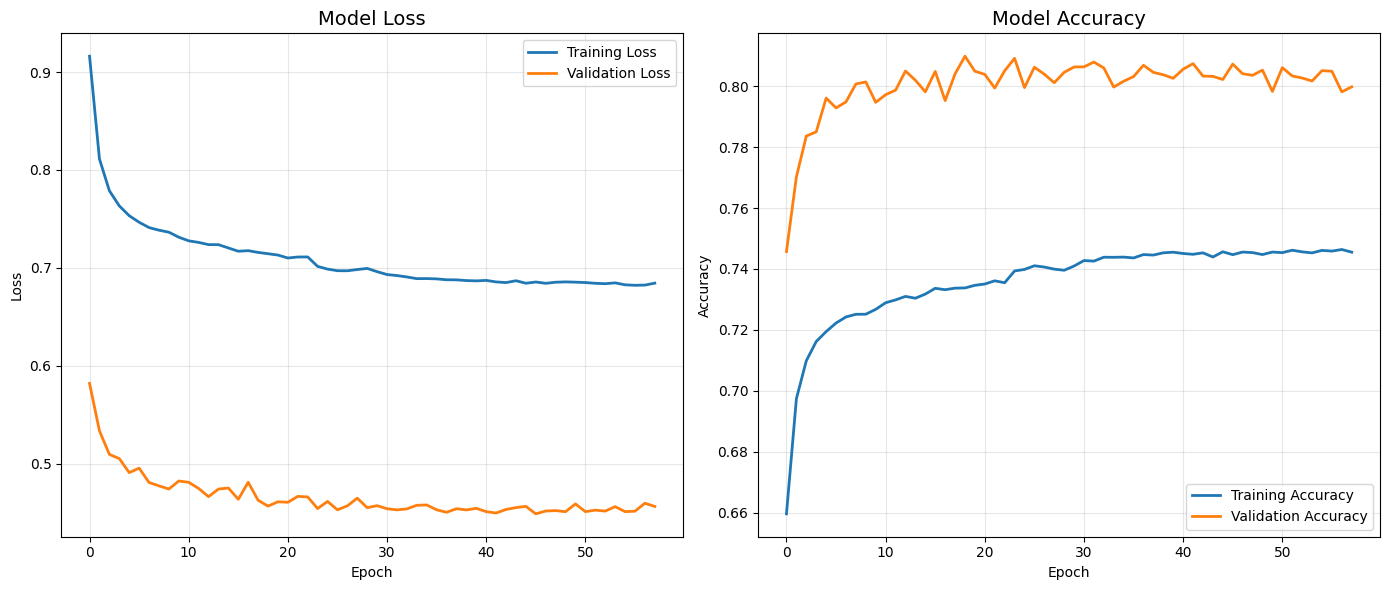

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#history nesnesinden verileri al
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(14, 6))

#Loss
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss', linewidth=2)
plt.plot(history_df['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history_df['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Tahminler yapılıyor...
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 6s 905us/step

🏆 Accuracy: %80.86
✨ Cohen's Kappa Score: 0.7613
--- Classification report ---
              precision    recall  f1-score   support

           A       0.94      0.95      0.94     43777
           B       0.87      0.85      0.86     54258
           C       0.84      0.78      0.81     54852
           D       0.65      0.75      0.70     26453
           E       0.61      0.66      0.63     14131
           F       0.43      0.67      0.53      6655
           G       0.94      0.62      0.75      9587

    accuracy                           0.81    209713
   macro avg       0.76      0.75      0.75    209713
weighted avg       0.82      0.81      0.81    209713



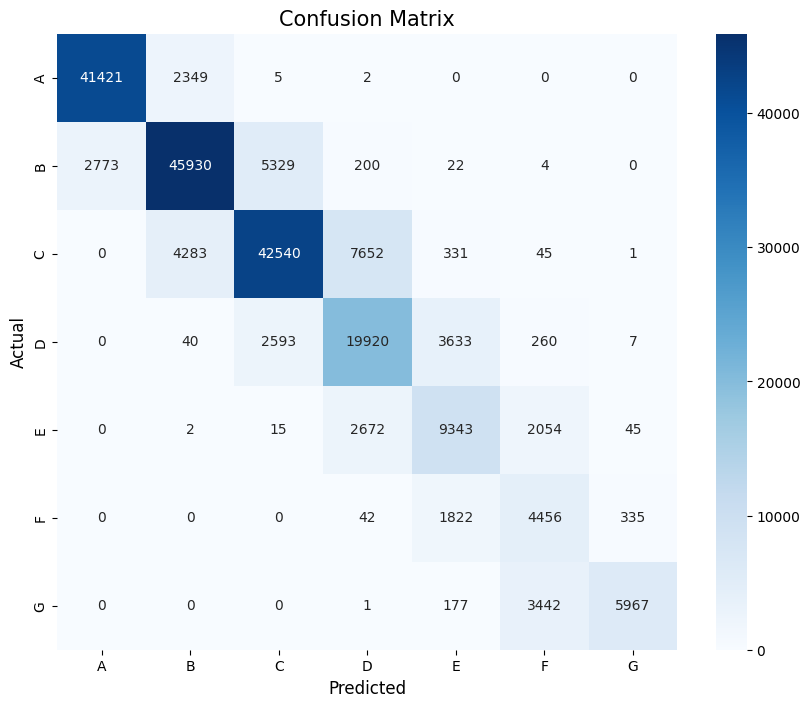

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score
import seaborn as sns

#Tahminleri Al
print("Tahminler yapılıyor...")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# One-Hot formatındaki gerçek etiketleri (y_test) normale çevir
y_test_labels = np.argmax(y_test, axis=1)

#Genel Doğruluk (Accuracy)
test_acc = accuracy_score(y_test_labels, y_pred)
print(f"\n🏆 Accuracy: %{test_acc*100:.2f}")

#Cohen's Kappa Skoru (Ödevde İsteniyor)
kappa = cohen_kappa_score(y_test_labels, y_pred)
print(f"✨ Cohen's Kappa Score: {kappa:.4f}")

#Detaylı Sınıflandırma Raporu (Precision, Recall, F1)
print("--- Classification report ---")
print(classification_report(y_test_labels, y_pred, target_names=class_names))

#Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_labels, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

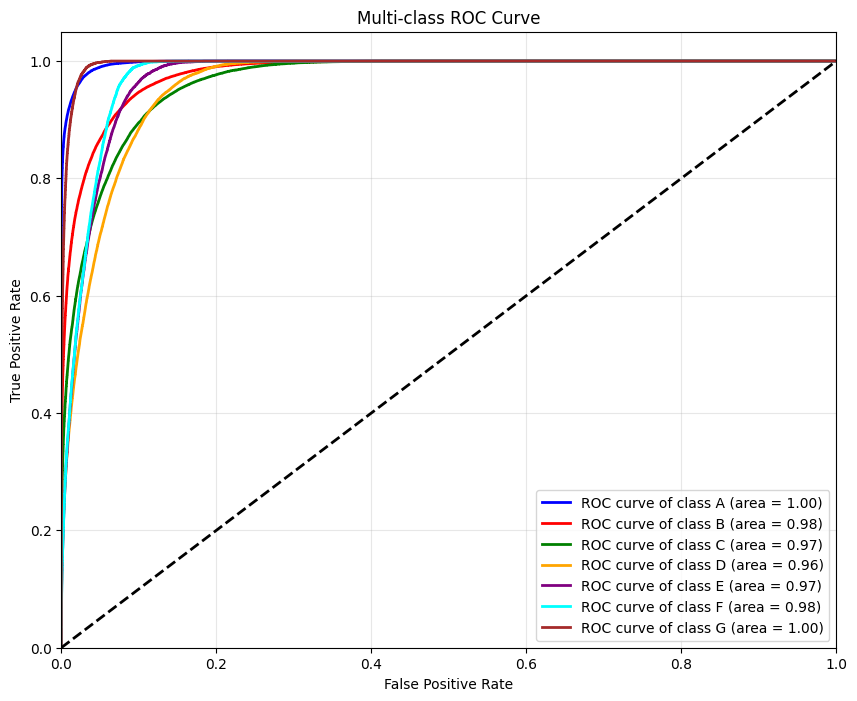

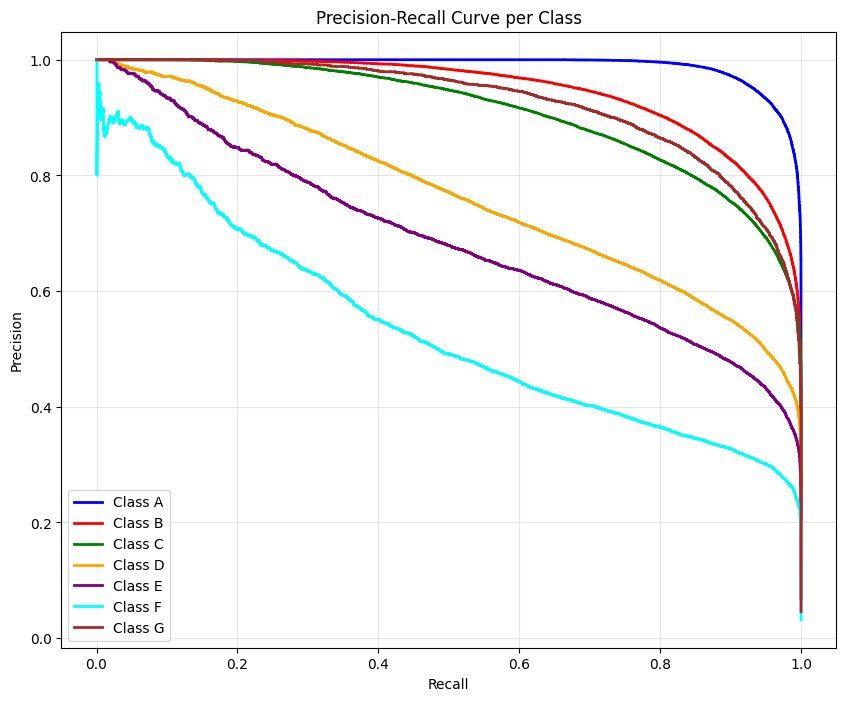

In [5]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Verileri Hazırla
# y_test zaten One-Hot formatında (örn: [[1,0,0...], [0,1,0...]])
# y_pred_probs: Modelin olasılık tahminleri
n_classes = len(class_names)

# --- GRAFİK 1: ROC CURVE (Alıcı İşletim Karakteristiği) ---
plt.figure(figsize=(10, 8))

# Her sınıf için ROC eğrisini hesapla ve çiz
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'brown'])

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# --- GRAFİK 2: PRECISION-RECALL CURVE ---
plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test[:, i], y_pred_probs[:, i])
    
    plt.plot(recall, precision, color=color, lw=2,
             label=f'Class {class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()